# Stout Case Study

In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [213]:
# loading the data
data=pd.read_csv("C:/Users/shwer/OneDrive/Desktop/archive/stout_data.csv")

In [214]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [216]:
data.shape

(6362620, 11)

# Observations:
<b> Dataset has total 6.3 M records with 11 columns(features) </b>

In [217]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# Observations:
<b> Dataset is cleaned no missing values </b>

In [4]:
# Getting Counts of Type of Transaction with Fraud =0 and Fraud=1
data['Counts'] = data.groupby(['type','isFraud'])['type'].transform('count')

In [5]:
# Getting Counts of Type of Transaction
data['Counts_Overall_type'] = data.groupby(['type'])['type'].transform('count')

In [6]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Counts,Counts_Overall_type
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,2151495,2151495
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,2151495,2151495
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,4097,532909
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,4116,2237500
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,2151495,2151495


In [18]:
a

,type,Counts_Overall_type,isFraud,0
0,CASH_OUT,2237500,0,2233384
1,PAYMENT,2151495,0,2151495
2,CASH_IN,1399284,0,1399284
3,TRANSFER,532909,0,528812
4,DEBIT,41432,0,41432
5,CASH_OUT,2237500,1,4116
6,TRANSFER,532909,1,4097


# Visualizing different type of transaction made by user and count of it

Text(0.5, 1.0, 'Count of Transaction for each types of Transaction')

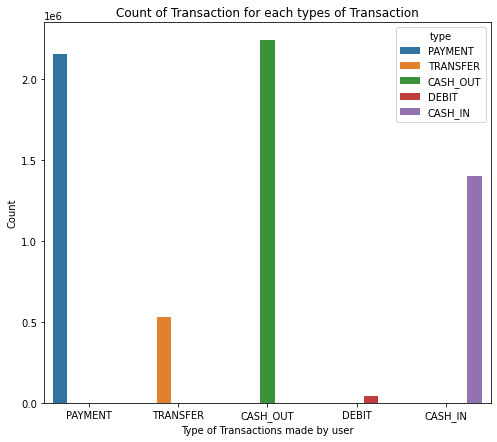

In [23]:
# Visualizing different type of transaction made by user and count of it
# reference: https://www.kite.com/python/answers/how-to-change-the-seaborn-plot-figure-size-in-python
fig_dims = (8, 7)
fig, ax = plt.subplots(figsize=fig_dims)
g= sns.barplot(x="type",y='Counts_Overall_type',data=data,hue="type",ax=ax)
plt.xlabel("Type of Transactions made by user")
plt.ylabel("Count")
plt.title("Count of Transaction for each types of Transaction")

plt.figure(figsize=(18,6))
ax = (data['transactionHour'].value_counts(sort=False, normalize=True) * 100).round(2).plot(kind='bar')
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height(), str(round(i.get_height(), 2)) + "%", fontsize=12, color='black')
plt.xlabel('Transaction hour', fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.ylabel('% of observations', fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')
plt.title('No. of observations at each hour', fontsize=20)
plt.show()

In [218]:
data['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

# Observations: 
<b><br>Cash Out is the most popular transaction type made by user i.e. 2237500 </b></br>
<b><br> Debit is the least transaction type made by user i.e. 41432 </b></br>

# Understanding fraud and non fraud tarnsactions made

Text(0.5, 1.0, 'Fraud Transaction Counts VS Valid Transactions Count')

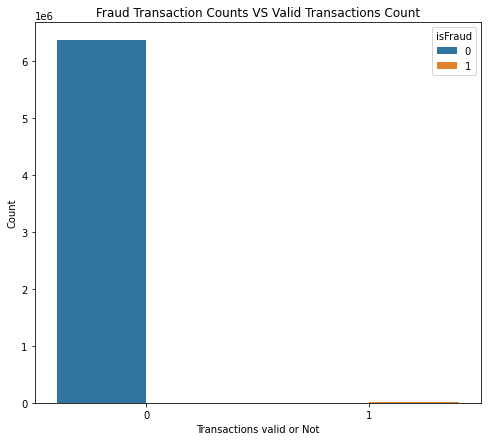

In [24]:
fig_dims = (8, 7)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot(x="isFraud", data=data,hue="isFraud",ax=ax)
plt.xlabel("Transactions valid or Not")
plt.ylabel("Count")
plt.title("Fraud Transaction Counts VS Valid Transactions Count")

In [25]:
data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

# Observations
<br><b> Valid Transaction are much more than invalid transactions. 8213 transactions are invalid and 6.3 M transactions are valid</b></br>

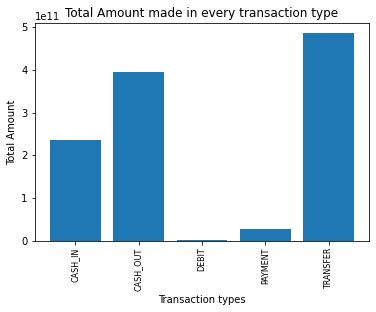

In [27]:
transaction_types = [types for types, df in data.groupby(['type'])]

plt.bar(transaction_types,data.groupby(['type']).sum()['amount'])
plt.ylabel('Total Amount')
plt.xlabel('Transaction types')
plt.xticks(transaction_types, rotation='vertical', size=8)
plt.title("Total Amount made in every transaction type")
plt.show()

In [28]:
data.groupby(['type']).sum()['amount']

type
CASH_IN     2.363674e+11
CASH_OUT    3.944130e+11
DEBIT       2.271992e+08
PAYMENT     2.809337e+10
TRANSFER    4.852920e+11
Name: amount, dtype: float64

# Observations:
<b><br> Amount of Transaction made by Transfer is the largest  even though it had very few Transfer Transactions made </br></b>
<b><br> While Payment transaction count was high but Amount of transaction made by Payment is less than rest type of transactions </br></b>


In [29]:
# Checking Illegal Attempt of Transfer (Amount >200)
print((data["isFraud"] == 1).sum())
print((data["isFraud"] == 0).sum())
(data["isFlaggedFraud"] == 1).sum()

8213
6354407


16

# Observations:
<br><b> Out of 8213 Fraud Transactions only 16 of them are considered Flagged Fraud because transactions which are greater thean >200 is flagged Fraud</br></b>
<br><b> Flagged Fraud are not even 1% of Total Fraud Transactions made</br></b>

# Visualizing different types of Transactions with their count of Frauds transactions

<AxesSubplot:xlabel='type', ylabel='count'>

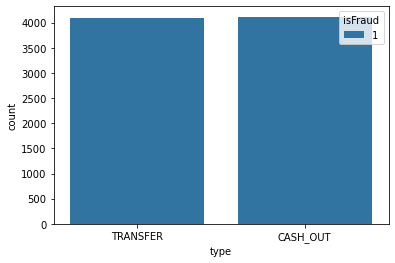

In [30]:
data1=data[data["isFraud"]==1]
sns.countplot(x='type',hue='isFraud',data=data1)

In [31]:
data1.groupby(['type']).sum()['isFraud']

type
CASH_OUT    4116
TRANSFER    4097
Name: isFraud, dtype: int64

# Observations:
<br><b> Of all the different types of transactions made CashOut and Transfer has only Fraud Cases i.e. CashIn, Debit and Payment has no Fraud cases </b></br>

In [33]:
data['Percentage']=(data['Counts']/data['Counts_Overall_type'])*100

In [35]:
data3=data[['type','isFraud','Percentage']]

<AxesSubplot:xlabel='type', ylabel='Percentage'>

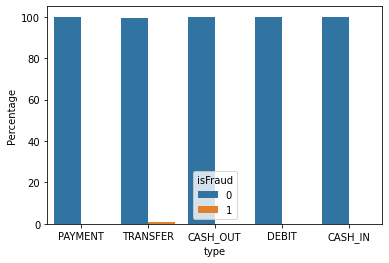

In [36]:
sns.barplot(x='type',y='Percentage',hue='isFraud',data=data3)

In [38]:
data3.value_counts()

type      isFraud  Percentage
CASH_OUT  0        99.816045     2233384
PAYMENT   0        100.000000    2151495
CASH_IN   0        100.000000    1399284
TRANSFER  0        99.231201      528812
DEBIT     0        100.000000      41432
CASH_OUT  1        0.183955         4116
TRANSFER  1        0.768799         4097
dtype: int64

# Observations: 
<b><br> Fraud cases are very minimal around 0.76 % for Transfer and 0.18 % for Cash_Out </br></b>

In [76]:
# Extracting hour of day from Step Column
data['transactionHour'] = data['step'] % 24

In [77]:
data.head(1)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Counts,Counts_Overall_type,Percentage,transactionHour,Transaction_hourly_count
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,2151495,2151495,100.0,1,71587.0


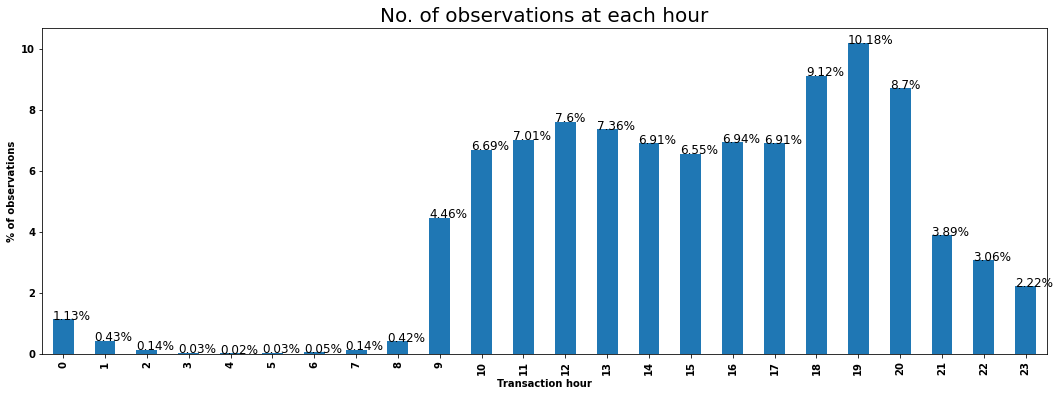

In [84]:
# reference: https://stackoverflow.com/questions/49059956/pandas-plot-value-counts-barplot-in-descending-manner
plt.figure(figsize=(18,6))
ax = (data['transactionHour'].value_counts(sort=False, normalize=True) * 100).round(2).plot(kind='bar')
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height(), str(round(i.get_height(), 2)) + "%", fontsize=12, color='black')
plt.xlabel('Transaction hour', fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.ylabel('% of observations', fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')
plt.title('No. of observations at each hour', fontsize=20)
plt.show()

# Observations: 
<b><br> Most of transactions occur between 9 am - 8 pm </br></b>

In [95]:
data.head(1)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Counts,Counts_Overall_type,Percentage,transactionHour,Transaction_hourly_count,errorBalanceOrig
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,2151495,2151495,100.0,1,71587.0,0.0


In [96]:
# For Outgoing transactions 
# Error=(Amount-OldBalance)+NewBalance should be 0 

In [97]:
data['errorBalanceOriginal'] = data['amount'] - data['oldbalanceOrg']+ data['newbalanceOrig'] 

In [98]:
data[data['errorBalanceOriginal']==0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Counts,Counts_Overall_type,Percentage,transactionHour,Transaction_hourly_count,errorBalanceOrig
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,2151495,2151495,100.000000,1,71587.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,2151495,2151495,100.000000,1,27111.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,4097,532909,0.768799,1,9018.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,4116,2237500,0.183955,1,2007.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,2151495,2151495,100.000000,1,1241.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,4116,2237500,0.183955,23,NaN,0.0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,4097,532909,0.768799,23,NaN,0.0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,4116,2237500,0.183955,23,NaN,0.0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,4097,532909,0.768799,23,NaN,0.0


In [100]:
# Similarly for destination account valid for outgoing transactions only
data['errorBalanceDestination'] = data['oldbalanceDest'] + data['amount'] - data['newbalanceDest']

In [101]:
data.head(1)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Counts,Counts_Overall_type,Percentage,transactionHour,Transaction_hourly_count,errorBalanceOrig,errorBalanceDestination
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,2151495,2151495,100.0,1,71587.0,0.0,9839.64


In [102]:
# Understanding more about Fraud Cases 
data1=data[data['isFraud']==1]

In [104]:
# Checking if old balance original and new balance original wrt Fraud Cases
# Reference: https://stackoverflow.com/questions/22591174/pandas-multiple-conditions-while-indexing-data-frame-unexpected-behavior
data2=data1[(data1['oldbalanceOrg']==0) & (data1['newbalanceOrig']==0)]

In [106]:
len(data2)

41

In [107]:
len(data1)

8213

In [108]:
41/8213

0.00499208571776452

# Observations:
<br> 0.5% of total fraud cases occur when Old And New Balance Original are 0</br>

In [110]:
# Checking if old balance original and new balance original wrt Fraud Cases
# Reference: https://stackoverflow.com/questions/22591174/pandas-multiple-conditions-while-indexing-data-frame-unexpected-behavior
data3=data1[(data1['oldbalanceDest']==0) & (data1['newbalanceDest']==0)]

In [111]:
len(data3)

4076

In [112]:
4076/8213

0.49628637525873615

# Observations:
<br> Around 50% of total fraud points are when Old and New Destination is 0 </br>

In [113]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Counts,Counts_Overall_type,Percentage,transactionHour,Transaction_hourly_count,errorBalanceOrig,errorBalanceDestination
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,2151495,2151495,100.000000,1,71587.0,0.0,9.839640e+03
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,2151495,2151495,100.000000,1,27111.0,0.0,1.864280e+03
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,4097,532909,0.768799,1,9018.0,0.0,1.810000e+02
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,4116,2237500,0.183955,1,2007.0,0.0,2.136300e+04
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,2151495,2151495,100.000000,1,1241.0,0.0,1.166814e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,4116,2237500,0.183955,23,NaN,0.0,0.000000e+00
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,4097,532909,0.768799,23,NaN,0.0,6.311409e+06
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,4116,2237500,0.183955,23,NaN,0.0,1.000000e-02
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,4097,532909,0.768799,23,NaN,0.0,8.500025e+05


In [114]:

X=data[['type','amount','nameOrig','oldbalanceOrg','newbalanceOrig','nameDest','oldbalanceDest','newbalanceDest','transactionHour','errorBalanceOrig','errorBalanceDestination']]
y=data['isFraud'].values

In [115]:
X.head(1)

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,transactionHour,errorBalanceOrig,errorBalanceDestination
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,1,0.0,9839.64


In [131]:
# Splitting Train Test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y,random_state=1)

# Type encoding

In [132]:
# Knowing unique values in school_state
print(len(X_train['type'].unique()))


5


In [133]:
# Encode the column using label encoding
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
encoded_train_type=labelencoder.fit_transform(X_train['type'])
encoded_train_type.shape

(5090096,)

In [134]:
# Similarly do for test data 
encoded_test_type=labelencoder.transform(X_test['type'])
encoded_test_type.shape

(1272524,)

# Encoding all Numerical Features

In [175]:
# Train data for  numerical columns
X_train_amount = X_train['amount'].values.reshape(-1,1)
X_train_oldbalanceOrg = X_train['oldbalanceOrg'].values.reshape(-1,1)
X_train_newbalanceOrig = X_train['newbalanceOrig'].values.reshape(-1,1)
X_train_oldbalanceDest = X_train['oldbalanceDest'].values.reshape(-1,1)
X_train_newbalanceDest = X_train['newbalanceDest'].values.reshape(-1,1)
X_train_transactionHour = X_train['transactionHour'].values.reshape(-1,1)
X_train_errorBalanceOrig = X_train['errorBalanceOrig'].values.reshape(-1,1)
X_train_errorBalanceDestination = X_train['errorBalanceDestination'].values.reshape(-1,1)

# Test data for  numerical columns
X_test_amount = X_test['amount'].values.reshape(-1,1)
X_test_oldbalanceOrg = X_test['oldbalanceOrg'].values.reshape(-1,1)
X_test_newbalanceOrig = X_test['newbalanceOrig'].values.reshape(-1,1)
X_test_oldbalanceDest = X_test['oldbalanceDest'].values.reshape(-1,1)
X_test_newbalanceDest = X_test['newbalanceDest'].values.reshape(-1,1)
X_test_transactionHour = X_test['transactionHour'].values.reshape(-1,1)
X_test_errorBalanceOrig = X_test['errorBalanceOrig'].values.reshape(-1,1)
X_test_errorBalanceDestination = X_test['errorBalanceDestination'].values.reshape(-1,1)

# Concatenating 2 numerical columns for train and test data
numerical_feat_train = np.concatenate((X_train_amount, X_train_oldbalanceOrg,X_train_newbalanceOrig,X_train_oldbalanceDest, X_train_newbalanceDest, X_train_transactionHour, X_train_errorBalanceOrig, X_train_errorBalanceDestination), axis=1) # column wise
numerical_feat_test = np.concatenate((X_test_amount, X_test_oldbalanceOrg,X_test_newbalanceOrig, X_test_oldbalanceDest, X_test_newbalanceDest,X_test_transactionHour, X_test_errorBalanceOrig, X_test_errorBalanceDestination ), axis=1) # Column wise

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
numeric_norm_train = normalizer.fit_transform(numerical_feat_train)
numeric_norm_test = normalizer.transform(numerical_feat_test)

In [176]:
numeric_norm_train.shape

(5090096, 8)

In [177]:
train_type = np.expand_dims(encoded_train_type, axis=1)
test_type=np.expand_dims(encoded_test_type, axis=1)

In [178]:
# Concatenate all features
x=np.concatenate((train_type,numeric_norm_train), axis=1)
y=np.concatenate((test_type,numeric_norm_test), axis=1)

In [179]:
y.shape

(1272524, 9)

In [151]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

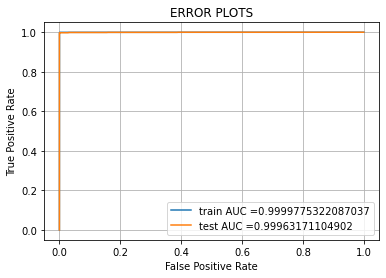

In [152]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
# Classifier with parameter
est1=RandomForestClassifier(n_jobs=-1, bootstrap=False, criterion='gini', max_depth= 8,min_samples_leaf= 5, n_estimators= 100)
est1.fit(x, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(est1, x)    
y_test_pred = batch_predict(est1, y)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

# Observations:
<br><b> Test AUC is 99.96 % meaning an given point the model will predict it correctly as Valid or Invalid Transactions by 99.96% </br></b>

In [205]:
# Accuracy 
y_pred=est1.predict(y) # predicting the data on test data points
y_pred #
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9999944991214311

In [184]:
# Reference: https://machinelearningmastery.com/calculate-feature-importance-with-python/
# getting feature importance 
importance=est1.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f'%(i,v))

Feature: 0, Score: 0.03333
Feature: 1, Score: 0.14346
Feature: 2, Score: 0.08135
Feature: 3, Score: 0.38372
Feature: 4, Score: 0.01611
Feature: 5, Score: 0.10666
Feature: 6, Score: 0.01517
Feature: 7, Score: 0.13052
Feature: 8, Score: 0.08967


# Observations:
<br>X_train_amount , X_train_newbalanceOrig, X_train_newbalanceDest and X_train_errorBalanceOrig are the best features for Model prediction , can use these subset of features for only Model Building and Prediction and see the results</br>

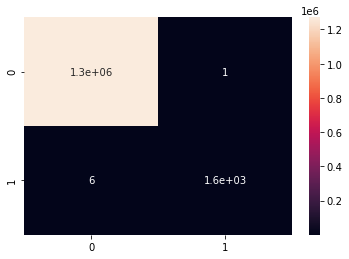

array([[1270880,       1],
       [      6,    1637]], dtype=int64)

In [206]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test,y_pred)
sns.heatmap(cm1,annot=True)
plt.show(ax)
cm1

# Observations:
<br> Model is making very few errors in predicting Valid Transactions as Invalid Transactions while only 1 error in Predicting Invalid Transactions as Valid Transactions which is very good </br>

# Decision Tree

In [194]:
# Trying the Hyperparameter Tuning for Decision Tree
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
random_grid_dt={'max_depth':[2,4,6,8,12,15,25,50,75],
                'splitter':['best', 'random'],
             'criterion':['gini','entropy']
             }

In [195]:
# Creating a function 
def hypertuning_dtcv(est,random_grid,nbr_iter,X,y):
    dtsearch=RandomizedSearchCV(est,param_distributions=random_grid,n_jobs=-1,n_iter=nbr_iter,cv=3,return_train_score=True) # kfold cv=5 
    dtsearch.fit(x,y_train)  # Fitting the RandomizedSearchCV on data
    ht_params=dtsearch.best_params_ # Getting best parameters 
    ht_score=dtsearch.best_score_ # Getting Score of randomziedSearchCV
    results_dt=pd.DataFrame(dtsearch.cv_results_)
    return ht_params,ht_score,results_dt

In [196]:
dt_parameters, dt_ht_score,results_dt=hypertuning_dtcv(dtc,random_grid_dt,3,x,y_train) # 3 possible random combinations(options) to selected 

In [197]:
results_dt[['param_splitter','param_max_depth','param_criterion','mean_test_score','mean_train_score']]

,param_splitter,param_max_depth,param_criterion,mean_test_score,mean_train_score
0,random,50,entropy,0.999978,0.999999
1,best,12,entropy,0.999992,0.999999
2,random,15,gini,0.999750,0.999761


In [198]:
dt_parameters

{'splitter': 'best', 'max_depth': 12, 'criterion': 'entropy'}

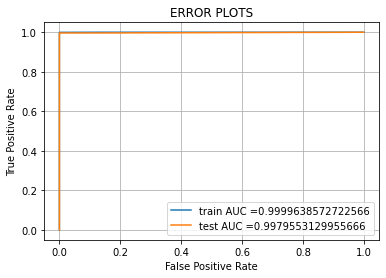

In [200]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
# Classifier with parameter
dtc1=DecisionTreeClassifier(criterion='entropy', max_depth= 12,splitter='best')
dtc1.fit(x, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(dtc1, x)    
y_test_pred = batch_predict(dtc1, y)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

# observations:
<br><b> Test AUC score is 99.79% i.e. Given a point it will be 99.79% correctly predicted as Valid or invalid transactions </br></b>

In [201]:
# Accuracy 
y_pred=dtc1.predict(y) # predicting the data on test data points
y_pred 
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9999921416020444

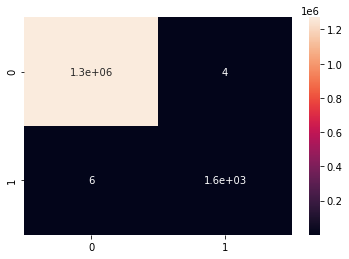

array([[1270877,       4],
       [      6,    1637]], dtype=int64)

In [203]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.show(ax)
cm

# Observations:
<br><b>Model is performing well making very few errors when Actual label is 1(Invalid Transaction) while prediction is 0(Valid Transaction)</br></b>
<br><b>Model making very few errors when actual label is 0(Valid Transaction) but prediction is 1 i.e. Invalid Transaction</br></b>

In [204]:
# Reference: https://machinelearningmastery.com/calculate-feature-importance-with-python/
# getting feature importance 
importance=dtc1.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f'%(i,v))

Feature: 0, Score: 0.00999
Feature: 1, Score: 0.00014
Feature: 2, Score: 0.00100
Feature: 3, Score: 0.76990
Feature: 4, Score: 0.00053
Feature: 5, Score: 0.01193
Feature: 6, Score: 0.00418
Feature: 7, Score: 0.20150
Feature: 8, Score: 0.00083


# Observations:
<br> X_train_newbalanceOrig and X_train_errorBalanceOrig are two most important features for Decision Tree Model </br>
<br> Can use these subsets of features only for model building and gettting prediction results later instead of using all features </br>

In [211]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model", "Test-AUC","Test Accuracy"]

x.add_row([ "Random Forest", 0.99963,0.999994])
x.add_row([ "Decision Tree with Hyperparameter Tuning", 0.9979,0.999992])
print(x)

+------------------------------------------+----------+---------------+
|                  Model                   | Test-AUC | Test Accuracy |
+------------------------------------------+----------+---------------+
|              Random Forest               | 0.99963  |    0.999994   |
| Decision Tree with Hyperparameter Tuning |  0.9979  |    0.999992   |
+------------------------------------------+----------+---------------+


# Observations:
<br><b> Random forest has higher accuracy and AUc scores suggesting it is a better model </br></b>
<br><b> We can also use other Evaluation Metric like Recall (because) this can be important as Recall tells Out of all the Actual Positive points , How many are Predicted to be Positive points i.e. Say 100 points are Actual Valid Transactions, so out of which say 95 are Predicted as Valid transactions and we will come to know that 95 % of actual Valid Transactions points are correctly predicted while 5 % are incorrectly predicted and can dig deeper into these 5 incorrectly predicted points</br></b>
